# Crimes in Chicago
 I will explore crimes in Chicago from a perspective of a Chicago resident who wants to know more about the subject so he can better navigate his way through the city.
The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2020.
Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

#### In this notebook, I am going to explore more about crime in Chicago and try to answer few questions:

- How has crime in Chicago changed across years?
- the bloodiest year in two decades?
- Are some types of crimes more likely to happen in specific locations or specific time of the day or specific day of the week than other types of crimes?

In [188]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
%matplotlib inline

In [190]:
data = pd.read_csv("J:\Datasets\Crimes_-_2001_to_present.csv")

C:\Anaconda3\envs\deep\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [191]:
data.head(10)

ID Case Number                    Date                  Block  IUCR  \
0  11034701    JA366925  01/01/2001 11:00:00 AM        016XX E 86TH PL  1153   
1  11227287    JB147188  10/08/2017 03:00:00 AM     092XX S RACINE AVE  0281   
2  11227583    JB147595  03/28/2017 02:00:00 PM        026XX W 79TH ST  0620   
3  11227293    JB147230  09/09/2017 08:17:00 PM   060XX S EBERHART AVE  0810   
4  11227634    JB147599  08/26/2017 10:00:00 AM    001XX W RANDOLPH ST  0281   
5  11227517    JB138481  02/10/2013 12:00:00 AM  071XX S LAFAYETTE AVE  0266   
6  11227503    JB146383  01/01/2015 12:01:00 AM   061XX S KILBOURN AVE  1751   
7  11227508    JB146365  01/01/2017 12:01:00 AM     027XX S WHIPPLE ST  1754   
8  11022695    JA353568  07/17/2017 10:10:00 AM    021XX W MC LEAN AVE  0810   
9  11227633    JB147500  12/28/2017 03:55:00 PM   011XX S MICHIGAN AVE  1153   

                 Primary Type                          Description  \
0          DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1         CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
2                    BURGLARY                       UNLAWFUL ENTRY   
3                       THEFT                            OVER $500   
4         CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
5         CRIM SEXUAL ASSAULT                            PREDATORY   
6  OFFENSE INVOLVING CHILDREN         CRIM SEX ABUSE BY FAM MEMBER   
7  OFFENSE INVOLVING CHILDREN       AGG SEX ASSLT OF CHILD FAM MBR   
8                       THEFT                            OVER $500   
9          DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False     False  ...   8.0            45.0        11   
1            RESIDENCE   False     False  ...  21.0            73.0        02   
2                OTHER   False     False  ...  18.0            70.0        05   
3            RESIDENCE   False     False  ...  20.0            42.0        06   
4          HOTEL/MOTEL   False     False  ...  42.0            32.0        02   
5            RESIDENCE   False     False  ...   6.0            69.0        02   
6            RESIDENCE   False      True  ...  13.0            65.0        17   
7            RESIDENCE   False     False  ...  12.0            30.0        02   
8            RESIDENCE   False     False  ...  32.0            22.0        06   
9                  NaN   False     False  ...   2.0            32.0        11   

   X Coordinate Y Coordinate  Year              Updated On  Latitude  \
0           NaN          NaN  2001  08/05/2017 03:50:08 PM       NaN   
1           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
2           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
3           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
4           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
5           NaN          NaN  2013  02/11/2018 03:57:41 PM       NaN   
6           NaN          NaN  2015  04/12/2019 04:00:15 PM       NaN   
7           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
8           NaN          NaN  2017  07/24/2017 03:54:23 PM       NaN   
9           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   

  Longitude  Location  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  
5       NaN       NaN  
6       NaN       NaN  
7       NaN       NaN  
8       NaN       NaN  
9       NaN       NaN  

[10 rows x 22 columns]

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7138650 entries, 0 to 7138649
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [193]:
def showtable(df):
    '''
    Returns few key metrics of a dataframe.
    '''
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [194]:
from scipy import stats

In [195]:
showtable(data)

Dataset Shape: (7138650, 22)


Name   dtypes  Missing  Uniques  \
0                     ID    int64        0  7138650   
1            Case Number   object        4  7138211   
2                   Date   object        0  2892834   
3                  Block   object        0    60979   
4                   IUCR   object        0      402   
5           Primary Type   object        0       36   
6            Description   object        0      520   
7   Location Description   object     6861      212   
8                 Arrest     bool        0        2   
9               Domestic     bool        0        2   
10                  Beat    int64        0      304   
11              District  float64       47       24   
12                  Ward  float64   614827       50   
13        Community Area  float64   613484       78   
14              FBI Code   object        0       26   
15          X Coordinate  float64    68824    78731   
16          Y Coordinate  float64    68824   129946   
17                  Year    int64        0       20   
18            Updated On   object        0     3499   
19              Latitude  float64    68824   870674   
20             Longitude  float64    68824   870106   
21              Location   object    68824   871874   

                            First Value            Second Value  \
0                              11034701                11227287   
1                              JA366925                JB147188   
2                01/01/2001 11:00:00 AM  10/08/2017 03:00:00 AM   
3                       016XX E 86TH PL      092XX S RACINE AVE   
4                                  1153                    0281   
5                    DECEPTIVE PRACTICE     CRIM SEXUAL ASSAULT   
6   FINANCIAL IDENTITY THEFT OVER $ 300          NON-AGGRAVATED   
7                             RESIDENCE               RESIDENCE   
8                                 False                   False   
9                                 False                   False   
10                                  412                    2222   
11                                    4                      22   
12                                    8                      21   
13                                   45                      73   
14                                   11                      02   
15                                  NaN                     NaN   
16                                  NaN                     NaN   
17                                 2001                    2017   
18               08/05/2017 03:50:08 PM  02/11/2018 03:57:41 PM   
19                                  NaN                     NaN   
20                                  NaN                     NaN   
21                                  NaN                     NaN   

               Third Value  Entropy  
0                 11227583    22.77  
1                 JB147595    22.77  
2   03/28/2017 02:00:00 PM    20.58  
3          026XX W 79TH ST    14.37  
4                     0620     5.64  
5                 BURGLARY     3.48  
6           UNLAWFUL ENTRY     5.48  
7                    OTHER     4.04  
8                    False     0.85  
9                    False     0.57  
10                     835     8.10  
11                       8     4.41  
12                      18     5.48  
13                      70     5.83  
14                      05     3.55  
15                     NaN    15.31  
16                     NaN    15.96  
17                    2017     4.25  
18  02/11/2018 03:57:41 PM     2.79  
19                     NaN    17.93  
20                     NaN    17.93  
21                     NaN    17.93

## Features description

- ID : Unique identifier for the record.
- Case Number : The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
- Date : Date when the incident occurred. this is sometimes a best estimate.
- Block : The partially redacted address where the incident occurred, placing it on the same block as the actual address.
- IUCR : The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description.
- Primary Type :The primary description of the IUCR code.
- Describtion :The secondary description of the IUCR code, a subcategory of the primary description.
- Location Describtion :Description of the location where the incident occurred.
- Arrest : Indicates whether an arrest was made.
- Domestic : Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
- Beat : Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated.
- District : Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.
- Ward : The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.
- Community Area : Indicates the community area where the incident occurred. Chicago has 77 community areas. 
- FBI Code : Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
- X Coordinate : The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
- Y Coordinate : The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.    
- Year : Year the incident occurred.
- Update on : Date and time the record was last updated.
- Latitude : The latitude of the location where the incident occurred. This location is shifted from the actual location for
- Longitude : The longitude of the location where the incident occurred. This location is shifted from the actual location for
- Location : The location where the incident occurred in a format that allows for creation of maps and other geographic

As we can see the most missed values in Ward and community area features ,it's about 613827 missed value. let's drop them.

In [196]:
data = data [data["Community Area"].notnull()]

In [197]:
showtable(data)

Dataset Shape: (6525166, 22)


Name   dtypes  Missing  Uniques  \
0                     ID    int64        0  6525166   
1            Case Number   object        4  6524741   
2                   Date   object        0  2641172   
3                  Block   object        0    36758   
4                   IUCR   object        0      401   
5           Primary Type   object        0       35   
6            Description   object        0      519   
7   Location Description   object     6858      212   
8                 Arrest     bool        0        2   
9               Domestic     bool        0        2   
10                  Beat    int64        0      303   
11              District  float64       47       24   
12                  Ward  float64     2580       50   
13        Community Area  float64        0       78   
14              FBI Code   object        0       26   
15          X Coordinate  float64    59620    75053   
16          Y Coordinate  float64    59620   125207   
17                  Year    int64        0       20   
18            Updated On   object        0     3499   
19              Latitude  float64    59620   653116   
20             Longitude  float64    59620   652745   
21              Location   object    59620   653761   

                            First Value            Second Value  \
0                              11034701                11227287   
1                              JA366925                JB147188   
2                01/01/2001 11:00:00 AM  10/08/2017 03:00:00 AM   
3                       016XX E 86TH PL      092XX S RACINE AVE   
4                                  1153                    0281   
5                    DECEPTIVE PRACTICE     CRIM SEXUAL ASSAULT   
6   FINANCIAL IDENTITY THEFT OVER $ 300          NON-AGGRAVATED   
7                             RESIDENCE               RESIDENCE   
8                                 False                   False   
9                                 False                   False   
10                                  412                    2222   
11                                    4                      22   
12                                    8                      21   
13                                   45                      73   
14                                   11                      02   
15                                  NaN                     NaN   
16                                  NaN                     NaN   
17                                 2001                    2017   
18               08/05/2017 03:50:08 PM  02/11/2018 03:57:41 PM   
19                                  NaN                     NaN   
20                                  NaN                     NaN   
21                                  NaN                     NaN   

               Third Value  Entropy  
0                 11227583    22.64  
1                 JB147595    22.64  
2   03/28/2017 02:00:00 PM    20.46  
3          026XX W 79TH ST    14.07  
4                     0620     5.66  
5                 BURGLARY     3.48  
6           UNLAWFUL ENTRY     5.51  
7                    OTHER     4.04  
8                    False     0.84  
9                    False     0.57  
10                     835     8.09  
11                       8     4.40  
12                      18     5.48  
13                      70     5.83  
14                      05     3.55  
15                     NaN    15.24  
16                     NaN    15.86  
17                    2017     4.19  
18  02/11/2018 03:57:41 PM     2.67  
19                     NaN    17.63  
20                     NaN    17.63  
21                     NaN    17.63

let's do the previous step with Location feature.

In [198]:
data = data [data["Location"].notnull()]

In [199]:
print ("Rows           =",data.shape[0])
print ("Columns        =",data.shape[1])
print ("\nFeatures       =\n  ",data.columns.to_list())
print ("\nNull Vlaues    =",data.isnull().sum().values.sum())
print ("\nunique Vlaues  =\n",data.nunique())

Rows           = 6465546
Columns        = 22

Features       =
   ['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']

Null Vlaues    = 6969

unique Vlaues  =
 ID                      6465546
Case Number             6465122
Date                    2628572
Block                     36274
IUCR                        400
Primary Type                 35
Description                 518
Location Description        212
Arrest                        2
Domestic                      2
Beat                        303
District                     24
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              75053
Y Coordinate             125207
Year                         20
Updated On                 2577
Latitude   

In [200]:
data.isnull().sum().values 

array([   0,    3,    0,    0,    0,    0,    0, 4496,    0,    0,    0,
         47, 2423,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int64)

In [201]:
data.columns.to_list()

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [202]:
data = data [data["Location Description"].notnull()]

In [203]:
data.isnull().sum().values 

array([   0,    3,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         47, 2423,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int64)

In [204]:
data = data [data["Ward"].notnull()]

In [205]:
data.isnull().sum().values 

array([ 0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0, 47,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0], dtype=int64)

In [206]:
data = data [data["District"].notnull()] 
data = data [data["Case Number"].notnull()]

In [207]:
print ("Rows           =",data.shape[0])
print ("Columns        =",data.shape[1])
print ("\nFeatures       =\n  ",data.columns.to_list())
print ("\nNull Vlaues    =",data.isnull().sum().values.sum())
print ("\nunique Vlaues  =\n",data.nunique())

Rows           = 6458577
Columns        = 22

Features       =
   ['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']

Null Vlaues    = 0

unique Vlaues  =
 ID                      6458577
Case Number             6458156
Date                    2625344
Block                     35965
IUCR                        400
Primary Type                 35
Description                 518
Location Description        212
Arrest                        2
Domestic                      2
Beat                        303
District                     24
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              75026
Y Coordinate             125198
Year                         20
Updated On                 2577
Latitude      

## Now the dataset is clean , no nulls

In [208]:
data.head()

ID Case Number                    Date               Block  IUCR  \
60287  11556037    JC103643  01/03/2019 07:20:00 PM     0000X W RWY 27R  2890   
62205  11626027    JC188126  03/16/2019 05:58:00 PM    001XX N WELLS ST  0460   
62546  11622422    JC183696  03/12/2019 10:00:00 PM     008XX E 38TH PL  0820   
62578  11625922    JC185669  03/14/2019 06:42:00 PM  074XX N PAULINA ST  0460   
62579  11622907    JC185406  03/14/2019 04:03:00 PM     008XX E 38TH PL  5002   

                 Primary Type            Description  \
60287  PUBLIC PEACE VIOLATION        OTHER VIOLATION   
62205                 BATTERY                 SIMPLE   
62546                   THEFT         $500 AND UNDER   
62578                 BATTERY                 SIMPLE   
62579           OTHER OFFENSE  OTHER VEHICLE OFFENSE   

                Location Description  Arrest  Domestic  ...  Ward  \
60287                       AIRCRAFT   False     False  ...  41.0   
62205                         STREET   False     False  ...  42.0   
62546  RESIDENTIAL YARD (FRONT/BACK)   False     False  ...   4.0   
62578                      RESIDENCE   False     False  ...  49.0   
62579                         STREET   False      True  ...   4.0   

       Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
60287            76.0        26     1100374.0    1943906.0  2019   
62205            32.0       08B     1174723.0    1900866.0  2019   
62546            36.0        06     1182276.0    1879784.0  2019   
62578             1.0       08B     1163827.0    1949311.0  2019   
62579            36.0        26     1182227.0    1879766.0  2019   

                   Updated On   Latitude  Longitude  \
60287  08/17/2019 03:57:45 PM  42.002816 -87.906094   
62205  08/17/2019 03:57:45 PM  41.883369 -87.633860   
62546  08/17/2019 03:57:45 PM  41.825347 -87.606781   
62578  08/17/2019 03:57:45 PM  42.016542 -87.672499   
62579  08/17/2019 03:57:45 PM  41.825299 -87.606961   

                            Location  
60287   (42.002816387, -87.90609433)  
62205   (41.88336939, -87.633860272)  
62546  (41.825346902, -87.606780575)  
62578  (42.016541612, -87.672499325)  
62579    (41.825298645, -87.6069609)  

[5 rows x 22 columns]

- We will use the 'Date' column to explore temporal patterns,
- 'Primary Type' and 'Location Description' to investigate their relationship with time (month of the year, time of the day). 
- we will use geolocation to map out safe spots (and times) in the city.

In [209]:
df = data
df = df.drop(['Case Number', 'IUCR','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'],axis=1)

In [210]:
df.shape

(6458577, 13)

In [211]:
df.head()

ID                    Date               Block  \
60287  11556037  01/03/2019 07:20:00 PM     0000X W RWY 27R   
62205  11626027  03/16/2019 05:58:00 PM    001XX N WELLS ST   
62546  11622422  03/12/2019 10:00:00 PM     008XX E 38TH PL   
62578  11625922  03/14/2019 06:42:00 PM  074XX N PAULINA ST   
62579  11622907  03/14/2019 04:03:00 PM     008XX E 38TH PL   

                 Primary Type            Description  \
60287  PUBLIC PEACE VIOLATION        OTHER VIOLATION   
62205                 BATTERY                 SIMPLE   
62546                   THEFT         $500 AND UNDER   
62578                 BATTERY                 SIMPLE   
62579           OTHER OFFENSE  OTHER VEHICLE OFFENSE   

                Location Description  Arrest  Domestic  District  \
60287                       AIRCRAFT   False     False      16.0   
62205                         STREET   False     False       1.0   
62546  RESIDENTIAL YARD (FRONT/BACK)   False     False       2.0   
62578                      RESIDENCE   False     False      24.0   
62579                         STREET   False      True       2.0   

       X Coordinate  Y Coordinate   Latitude  Longitude  
60287     1100374.0     1943906.0  42.002816 -87.906094  
62205     1174723.0     1900866.0  41.883369 -87.633860  
62546     1182276.0     1879784.0  41.825347 -87.606781  
62578     1163827.0     1949311.0  42.016542 -87.672499  
62579     1182227.0     1879766.0  41.825299 -87.606961

In [61]:
# convert dates to pandas datetime format
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
df.index = pd.DatetimeIndex(df.Date)

In [62]:
df.head()

ID                Date               Block  \
Date                                                                    
2019-01-03 19:20:00  11556037 2019-01-03 19:20:00     0000X W RWY 27R   
2019-03-16 17:58:00  11626027 2019-03-16 17:58:00    001XX N WELLS ST   
2019-03-12 22:00:00  11622422 2019-03-12 22:00:00     008XX E 38TH PL   
2019-03-14 18:42:00  11625922 2019-03-14 18:42:00  074XX N PAULINA ST   
2019-03-14 16:03:00  11622907 2019-03-14 16:03:00     008XX E 38TH PL   

                               Primary Type            Description  \
Date                                                                 
2019-01-03 19:20:00  PUBLIC PEACE VIOLATION        OTHER VIOLATION   
2019-03-16 17:58:00                 BATTERY                 SIMPLE   
2019-03-12 22:00:00                   THEFT         $500 AND UNDER   
2019-03-14 18:42:00                 BATTERY                 SIMPLE   
2019-03-14 16:03:00           OTHER OFFENSE  OTHER VEHICLE OFFENSE   

                              Location Description  Arrest  Domestic  \
Date                                                                   
2019-01-03 19:20:00                       AIRCRAFT   False     False   
2019-03-16 17:58:00                         STREET   False     False   
2019-03-12 22:00:00  RESIDENTIAL YARD (FRONT/BACK)   False     False   
2019-03-14 18:42:00                      RESIDENCE   False     False   
2019-03-14 16:03:00                         STREET   False      True   

                     District  X Coordinate  Y Coordinate   Latitude  \
Date                                                                   
2019-01-03 19:20:00      16.0     1100374.0     1943906.0  42.002816   
2019-03-16 17:58:00       1.0     1174723.0     1900866.0  41.883369   
2019-03-12 22:00:00       2.0     1182276.0     1879784.0  41.825347   
2019-03-14 18:42:00      24.0     1163827.0     1949311.0  42.016542   
2019-03-14 16:03:00       2.0     1182227.0     1879766.0  41.825299   

                     Longitude  
Date                            
2019-01-03 19:20:00 -87.906094  
2019-03-16 17:58:00 -87.633860  
2019-03-12 22:00:00 -87.606781  
2019-03-14 18:42:00 -87.672499  
2019-03-14 16:03:00 -87.606961

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6458577 entries, 2019-01-03 19:20:00 to 2019-05-26 02:11:00
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
 8   District              float64       
 9   X Coordinate          float64       
 10  Y Coordinate          float64       
 11  Latitude              float64       
 12  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 603.6+ MB


## Feature describtion
- Date : Date when the incident occurred. this is sometimes a best estimate.
- Block : The partially redacted address where the incident occurred, placing it on the same block as the actual address.
- Primary Type :The primary description of the IUCR code.
- Describtion :The secondary description of the IUCR code, a subcategory of the primary description.
- Location Describtion :Description of the location where the incident occurred.
- Arrest : Indicates whether an arrest was made.
- Domestic : Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
- District : Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.
- X Coordinate : The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
- Y Coordinate : The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
- Latitude : The latitude of the location where the incident occurred. This location is shifted from the actual location for
- Longitude : The longitude of the location where the incident occurred. This location is shifted from the actual location for

In [66]:
print ("\nunique Vlaues  =\n",df.nunique())


unique Vlaues  =
 ID                      6458577
Date                    2625344
Block                     35965
Primary Type                 35
Description                 518
Location Description        212
Arrest                        2
Domestic                      2
District                     24
X Coordinate              75026
Y Coordinate             125198
Latitude                 652956
Longitude                652585
dtype: int64


As 'Location Description', 'Description' and 'Primary Type' columns are actually categorical columns, we will keep the most frequent categories and then cast them to a categorical type.

In [67]:
location_disc_list  = list(df['Location Description'].value_counts()[30:].index)
discription_list = list(df['Description'].value_counts()[30:].index)

In [68]:
df.loc[df['Location Description'].isin(location_disc_list) , df.columns=='Location Description'] = 'OTHER'
df.loc[df['Description'].isin(discription_list) , df.columns=='Description'] = 'OTHER'

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6458577 entries, 2019-01-03 19:20:00 to 2019-05-26 02:11:00
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
 8   District              float64       
 9   X Coordinate          float64       
 10  Y Coordinate          float64       
 11  Latitude              float64       
 12  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 603.6+ MB


In [71]:
df['Location Description'].nunique()

30

In [72]:
## convert those 3 columns into 'Categorical' type
df['Primary Type']         = pd.Categorical(df['Primary Type'])
df['Location Description'] = pd.Categorical(df['Location Description'])
df['Description']          = pd.Categorical(df['Description'])

In [73]:
df.head()

ID                Date               Block  \
Date                                                                    
2019-01-03 19:20:00  11556037 2019-01-03 19:20:00     0000X W RWY 27R   
2019-03-16 17:58:00  11626027 2019-03-16 17:58:00    001XX N WELLS ST   
2019-03-12 22:00:00  11622422 2019-03-12 22:00:00     008XX E 38TH PL   
2019-03-14 18:42:00  11625922 2019-03-14 18:42:00  074XX N PAULINA ST   
2019-03-14 16:03:00  11622907 2019-03-14 16:03:00     008XX E 38TH PL   

                               Primary Type            Description  \
Date                                                                 
2019-01-03 19:20:00  PUBLIC PEACE VIOLATION                  OTHER   
2019-03-16 17:58:00                 BATTERY                 SIMPLE   
2019-03-12 22:00:00                   THEFT         $500 AND UNDER   
2019-03-14 18:42:00                 BATTERY                 SIMPLE   
2019-03-14 16:03:00           OTHER OFFENSE  OTHER VEHICLE OFFENSE   

                              Location Description  Arrest  Domestic  \
Date                                                                   
2019-01-03 19:20:00                          OTHER   False     False   
2019-03-16 17:58:00                         STREET   False     False   
2019-03-12 22:00:00  RESIDENTIAL YARD (FRONT/BACK)   False     False   
2019-03-14 18:42:00                      RESIDENCE   False     False   
2019-03-14 16:03:00                         STREET   False      True   

                     District  X Coordinate  Y Coordinate   Latitude  \
Date                                                                   
2019-01-03 19:20:00      16.0     1100374.0     1943906.0  42.002816   
2019-03-16 17:58:00       1.0     1174723.0     1900866.0  41.883369   
2019-03-12 22:00:00       2.0     1182276.0     1879784.0  41.825347   
2019-03-14 18:42:00      24.0     1163827.0     1949311.0  42.016542   
2019-03-14 16:03:00       2.0     1182227.0     1879766.0  41.825299   

                     Longitude  
Date                            
2019-01-03 19:20:00 -87.906094  
2019-03-16 17:58:00 -87.633860  
2019-03-12 22:00:00 -87.606781  
2019-03-14 18:42:00 -87.672499  
2019-03-14 16:03:00 -87.606961

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6458577 entries, 2019-01-03 19:20:00 to 2019-05-26 02:11:00
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          category      
 4   Description           category      
 5   Location Description  category      
 6   Arrest                bool          
 7   Domestic              bool          
 8   District              float64       
 9   X Coordinate          float64       
 10  Y Coordinate          float64       
 11  Latitude              float64       
 12  Longitude             float64       
dtypes: bool(2), category(3), datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 474.3+ MB


In [75]:
cat_cols = ['Primary Type',"Description","Location Description"]

## Exploration and visulaization 

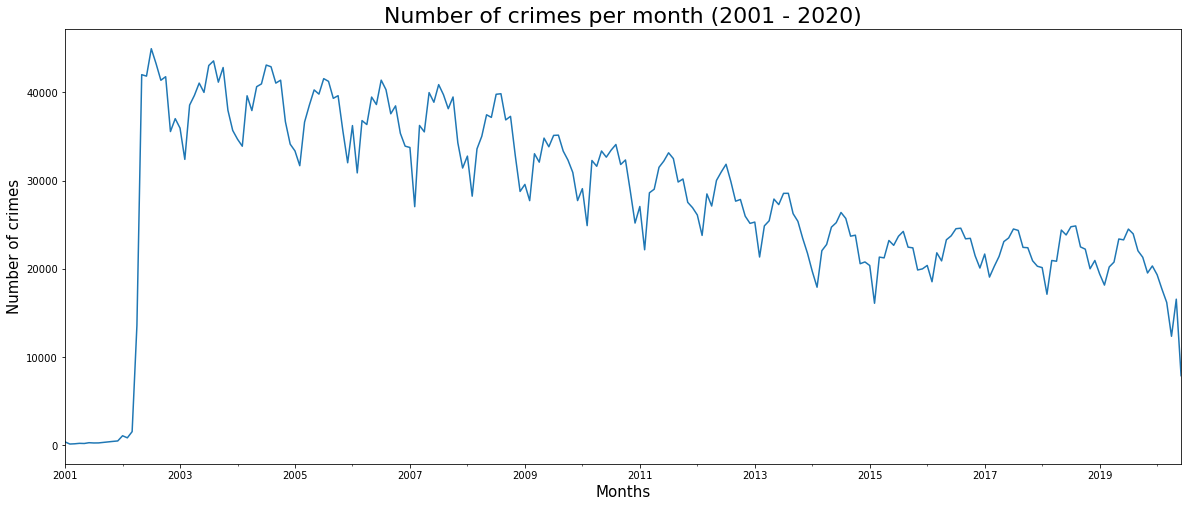

In [85]:
plt.figure(figsize=(20,8))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2001 - 2020)',fontsize=22)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of crimes',fontsize=15)
plt.show()

This plot shows a clear "periodic" pattern in the crimes over many years.it decreases over time

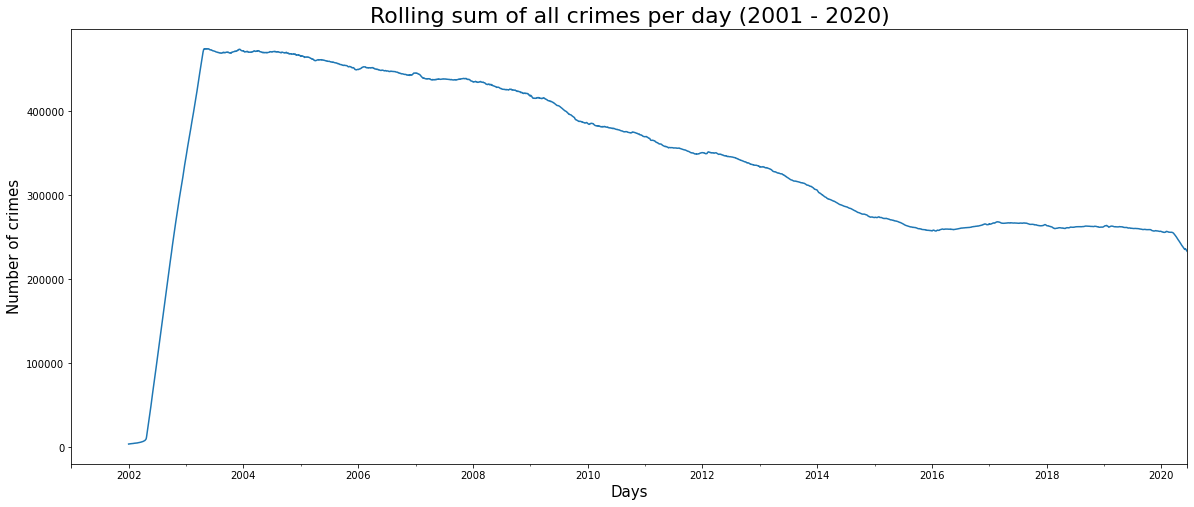

In [86]:
plt.figure(figsize=(20,8))

df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes per day (2001 - 2020)',fontsize=22)
plt.xlabel('Days',fontsize=15)
plt.ylabel('Number of crimes',fontsize=15)
plt.show()

In [88]:
## 2003 it may the bloodest year 
## Let's separate crimes by type and see

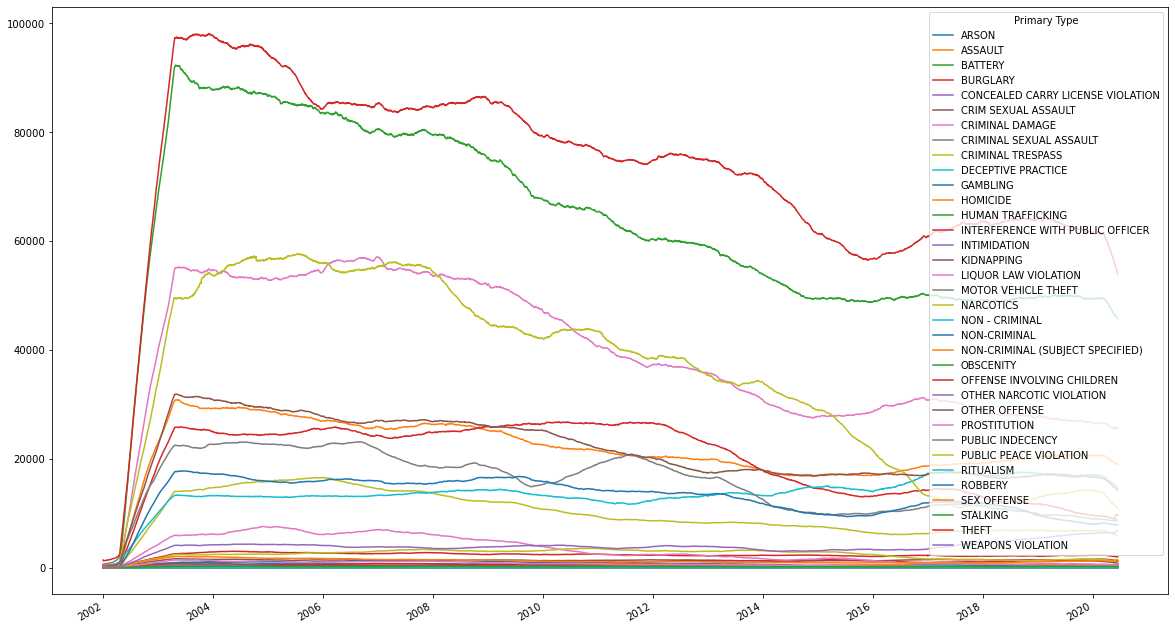

In [96]:
crimes_count_date = df.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=df.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(20, 12), subplots=False, layout=(-1, 3), sharex=False, sharey=False)

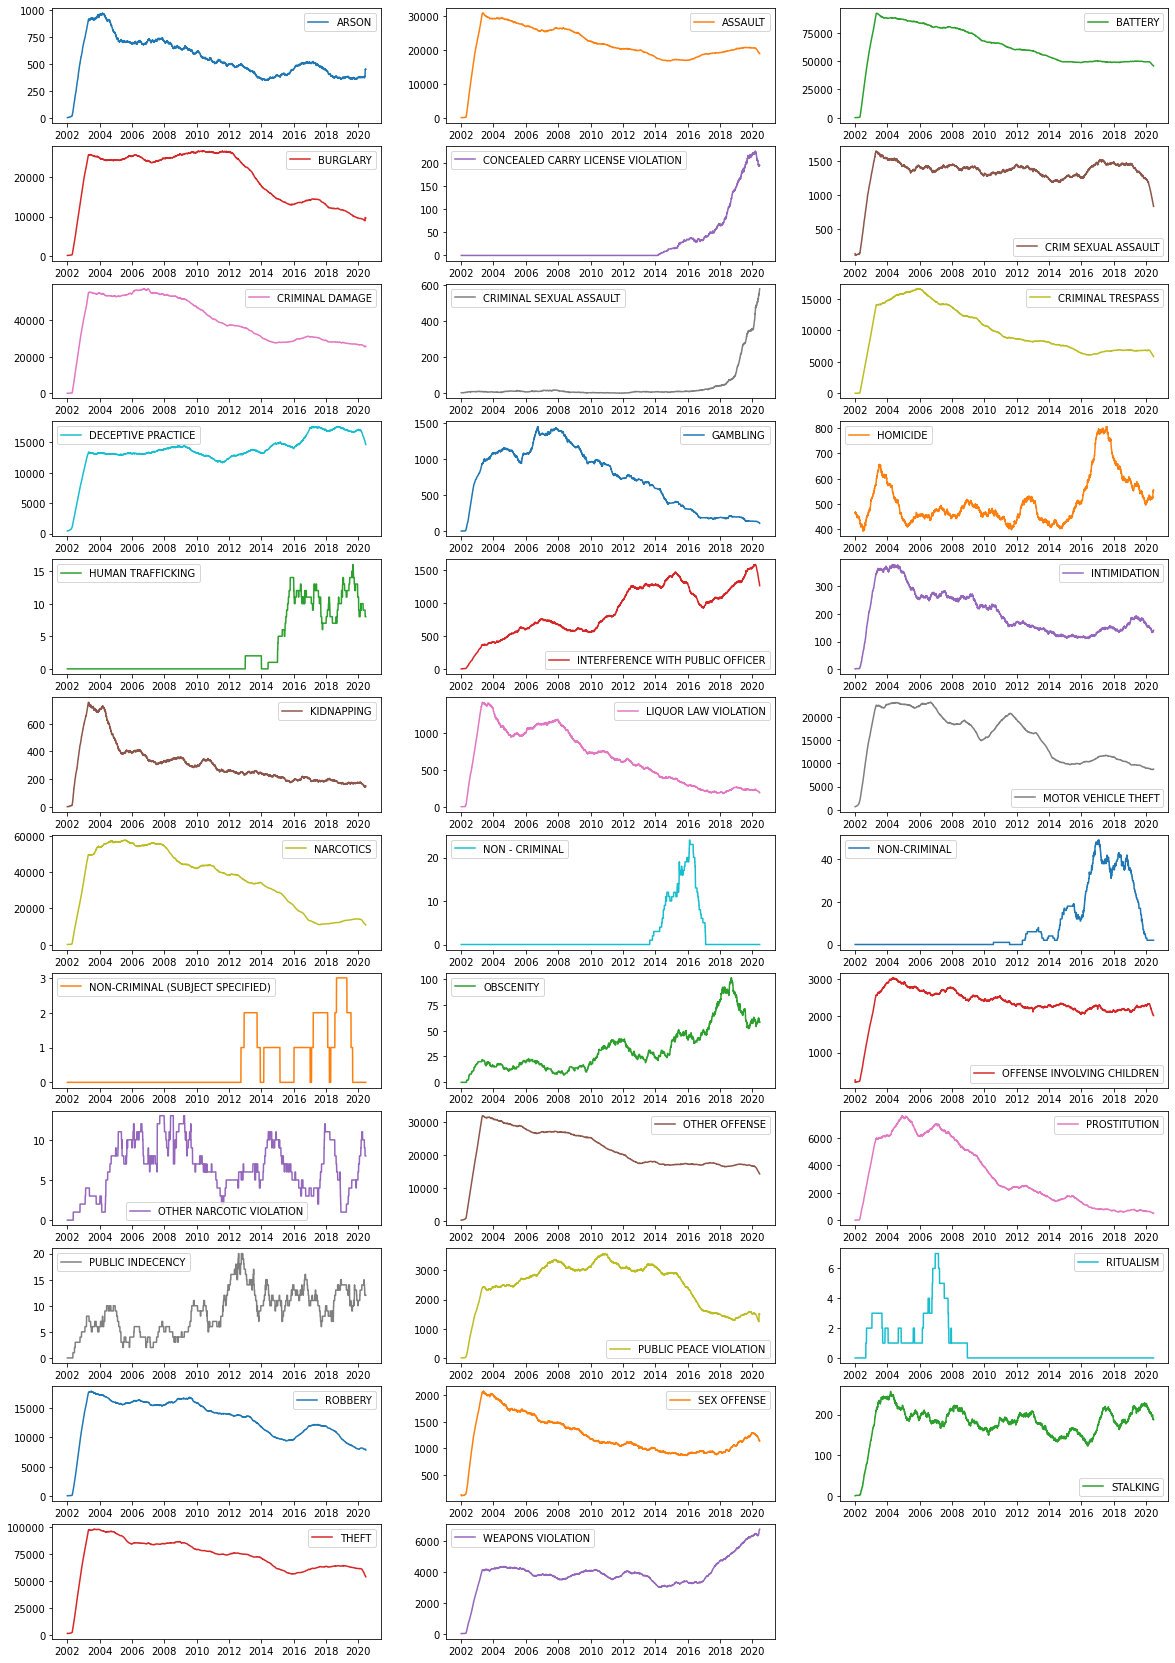

In [93]:
plot = crimes_count_date.rolling(365).sum().plot(figsize=(20, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [ ]:
# it is not as we thought, there are crimes decreasing and others increasing 
# Other types started to increase slightly before 2016 like "Weapons Violation","Stalking", "Obscenity" and others

### Crimes by day, type and location

Some crimes types are more likely to occur than other types depending on the place and time.

we will see how crimes differ between different places at different times.

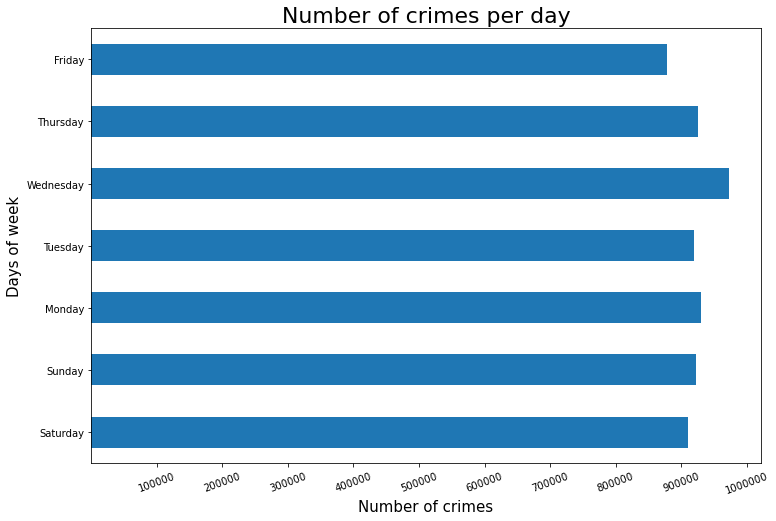

In [122]:
days = ['Saturday',"Sunday","Monday","Tuesday","Wednesday","Thursday","Friday"]
counts = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
plt.figure(figsize=(12,8))
df.groupby([df.index.dayofweek]).size().plot(kind = "barh")
plt.ylabel('Days of week',fontsize=15)
plt.yticks(np.arange(7), days)
plt.xticks(counts,counts,rotation=20)
plt.xlabel('Number of crimes',fontsize=15)
plt.title('Number of crimes per day',fontsize=22)
plt.show()

In [106]:
## Wednesday has higher number of crime than other days

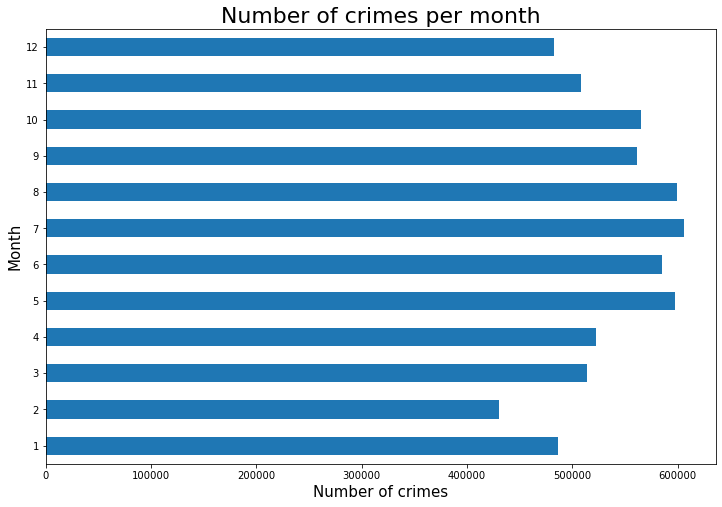

In [123]:
plt.figure(figsize=(12,8))
df.groupby([df.index.month]).size().plot(kind = "barh")
plt.ylabel('Month',fontsize=15)
plt.xlabel('Number of crimes',fontsize=15)
plt.title('Number of crimes per month',fontsize=22)
plt.show()

The highest months are May,June,July,August.
Crimes seem to peak at summer

Let's look at the types of crimes 

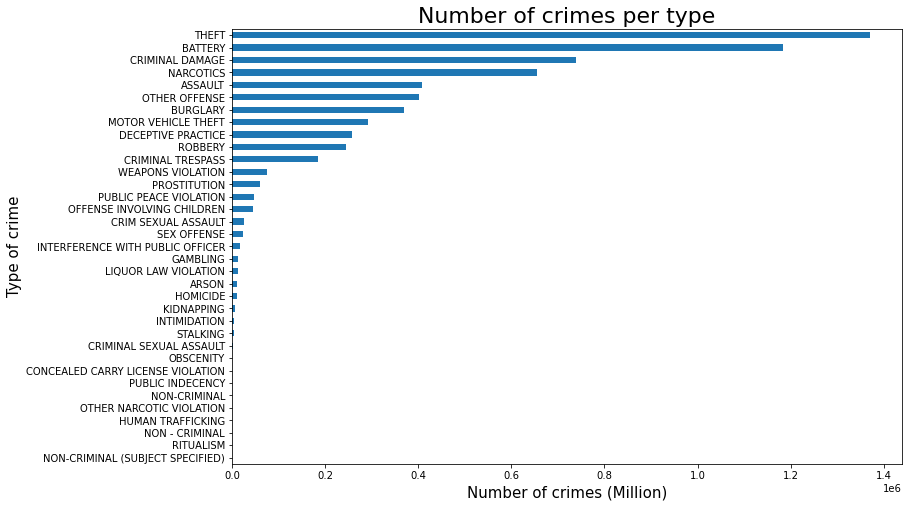

In [129]:
plt.figure(figsize=(12,8))
df.groupby([df["Primary Type"]]).size().sort_values(ascending=True).plot(kind = "barh")
plt.ylabel('Type of crime',fontsize=15)
plt.xlabel('Number of crimes (Million)',fontsize=15)
plt.title('Number of crimes per type',fontsize=22)
plt.show()

And for crime location

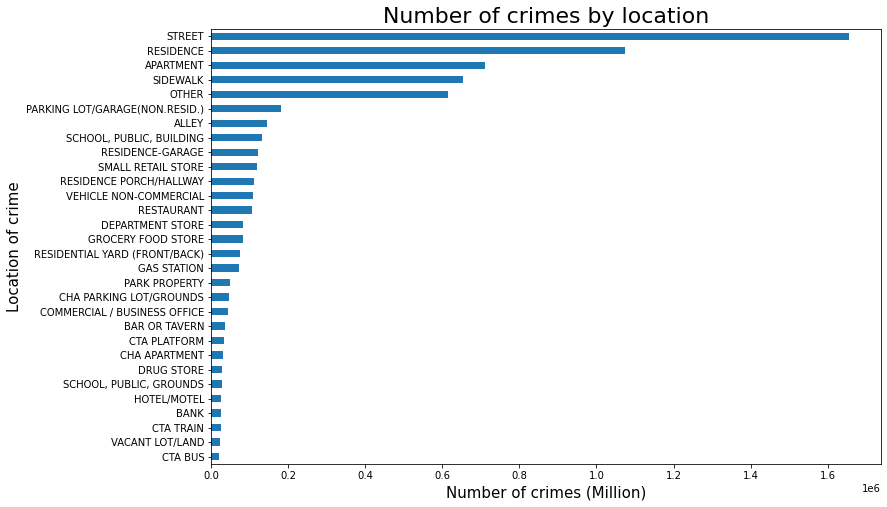

In [131]:
plt.figure(figsize=(12,8))
df.groupby([df["Location Description"]]).size().sort_values(ascending=True).plot(kind = "barh")
plt.ylabel('Location of crime',fontsize=15)
plt.xlabel('Number of crimes (Million)',fontsize=15)
plt.title('Number of crimes by location',fontsize=22)
plt.show()

**The most crimes occured in street**

Not all crimes are the same. Some crimes types are more likely to occur than other types depending on the place and time. 

we will see how crimes differ between different places at different times.

- After seeing the base rates of each crime location and type, we will now assume that all crime types (and locations) have the same frequency or, in other words, they are all equal overall.
- We are interested in detecting how a specific crime type is different across all days of the week or hours of the day.

- Is theft or burglary is more likely to occur at a weekday compared to a weekend? Are they more likely to happen in the morning vs evening or late night ? are they more likely to occur in a street vs a bar?

In [132]:
hour_by_location = df.pivot_table(values="ID",index="Location Description",columns=df.index.hour,aggfunc=np.size).fillna(0)

In [135]:
hour_by_type = df.pivot_table(values="ID",index="Primary Type",columns=df.index.hour,aggfunc=np.size).fillna(0)

In [153]:
hour_by_week = df.pivot_table(values="ID",index=df.index.hour,columns=df.index.weekday,aggfunc=np.size).fillna(0)

In [144]:
day_of_week_by_loaction = df.pivot_table(values="ID",index="Location Description",columns=df.index.dayofweek,aggfunc=np.size).fillna(0)

In [145]:
day_of_week_by_type = df.pivot_table(values="ID",index="Primary Type",columns=df.index.dayofweek,aggfunc=np.size).fillna(0)

In [151]:
location_by_type = df.pivot_table(values="ID",index="Location Description",columns="Primary Type",aggfunc=np.size).fillna(0)

**There is a trick to make heatmaps nicer looking is to use a clustering algorithm to sort the rows into meaningful groups and use group labels to re-sort our matrix.**

In [168]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.values()), np.abs(np.min(df_marginal_scaled.values()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

It is a "within-type/ across-hours" scaling that aims to show differences between frequencies of crimes at different hours. All types have the save "average" of crime counts, but not all hours have the same average. 

So a negative value indicate a lower frequency while a positive value indicate a higher frequency for that crime to occur in a particular hour.

let's see if there are "day crimes vs night crimes" 

As you can see, some crimes have their peaks during the early morning 

(upper part of the heatmap), other crimes peak during the day (mid-part of the heatmap) and the final group of crimes peak at night (lower part of the heatmap

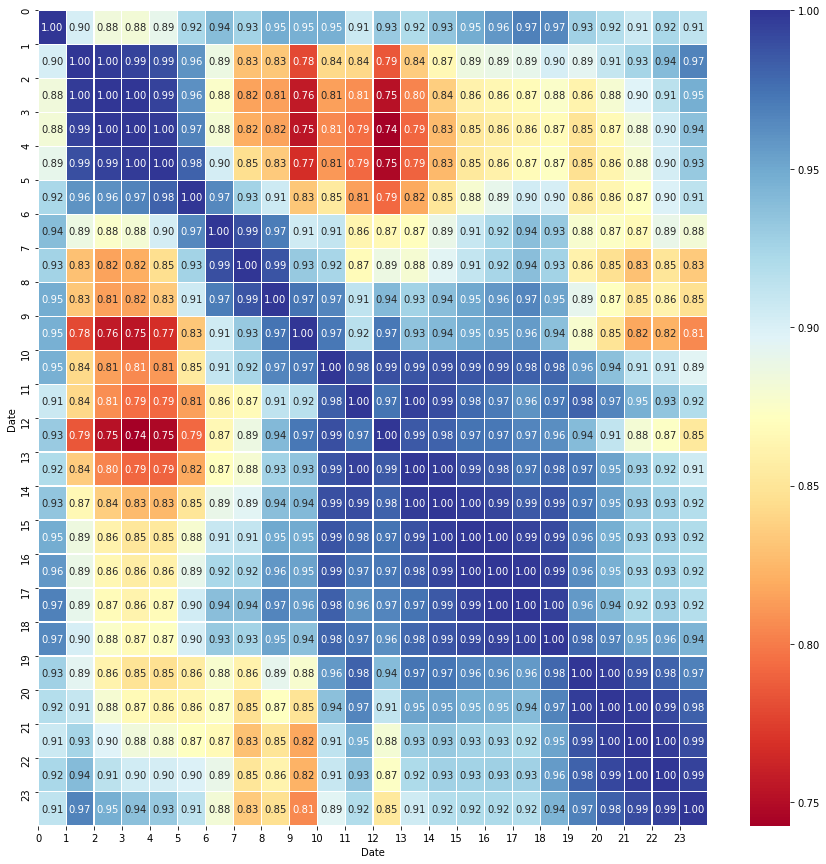

In [158]:
def heatmap(data):
    corr = data.corr()
    fig,ax = plt.subplots(figsize=(15,15))
    sns.heatmap(corr,cmap="RdYlBu",annot=True,fmt=".2f",linewidths=.2)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show
heatmap(hour_by_type)

### Where a certain crime type is most likely to happen?
To answer another type of questions: for a given crime (like theft or sexual assault), what is the most likely location for this crime to happen?

In this analysis, as with the previous ones, we take each crime type and re-normalize its location frequency to be between zero and one. 

This way, we can look at the top frequent locations of each crime type (darker red reflect a more frequent location).

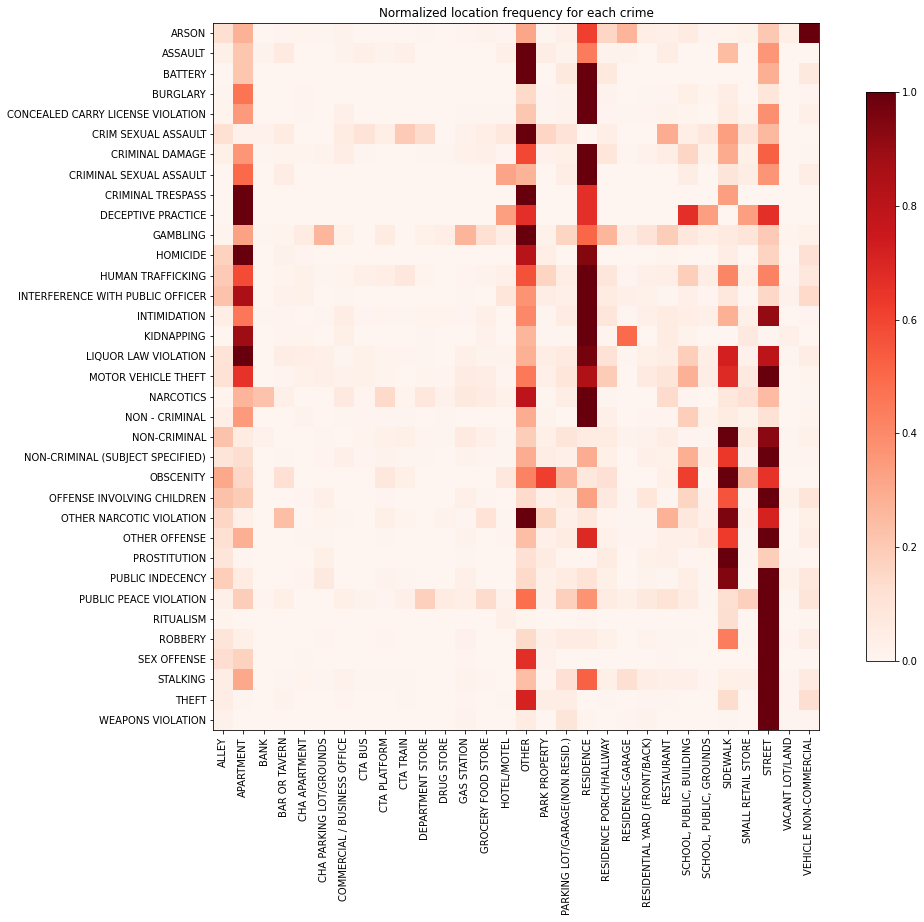

In [170]:
df1 = normalize(location_by_type)
ix = AC(3).fit(df1.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df1.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df1.shape[0]), df1.index, rotation='vertical')
plt.yticks(np.arange(df1.shape[1]), df1.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

Well, it appears that most crimes occur at either apartments, residence, sidewalks, streets or 'other'.

There are few notable exceptions here and there but those places are very frequent. 

**Prepare for geographic**

In [180]:
ctypes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 
          'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS',
          'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 
          'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER',
          'SEX OFFENSE', 'HOMICIDE', 'ARSON', 'GAMBLING', 'LIQUOR LAW VIOLATION',
          'KIDNAPPING', 'STALKING', 'INTIMIDATION']

In [182]:
import folium
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [214]:
locations = data.groupby('Community Area').first()

In [215]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [218]:
new_locations.head()

Latitude  Longitude          Location Description  Arrest
Community Area                                                            
0.0             41.881537 -87.616595                        STREET   False
1.0             42.016542 -87.672499                     RESIDENCE   False
2.0             41.998049 -87.709354                     APARTMENT    True
3.0             41.976183 -87.668801  COMMERCIAL / BUSINESS OFFICE   False
4.0             41.978160 -87.689240                      SIDEWALK   False

In [219]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [220]:
chicago_map

### Criminal Rate Index DataFrame

In [223]:
unique_locations = data['Location'].value_counts()
unique_locations.index

Index(['(41.976290414, -87.905227221)', '(41.754592961, -87.741528537)',
       '(41.883500187, -87.627876698)', '(41.897895128, -87.624096605)',
       '(41.909664252, -87.742728815)', '(41.896888586, -87.628203192)',
       '(41.885487535, -87.726422045)', '(41.788987036, -87.74147999)',
       '(41.88233367, -87.627841791)', '(41.904192368, -87.647000785)',
       ...
       '(41.7045666, -87.53584528)', '(41.967245972, -87.750187588)',
       '(41.838538723, -87.656205489)', '(41.851875482, -87.722717044)',
       '(41.943104374, -87.687494207)', '(41.711166117, -87.665769797)',
       '(41.677834404, -87.639974264)', '(42.013835753, -87.817584261)',
       '(41.912934307, -87.652333592)', '(41.935885443, -87.729553588)'],
      dtype='object', length=653601)

In [226]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

Raw_String  ValueCount
0  (41.976290414, -87.905227221)       13063
1  (41.754592961, -87.741528537)        9543
2  (41.883500187, -87.627876698)        7553
3  (41.897895128, -87.624096605)        4581
4  (41.909664252, -87.742728815)        3250

In [227]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)

### Chicago Mapping showing the total criminal rates

In [228]:
%%time

chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 45
    
    if CR_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

Wall time: 107 ms


In [229]:
chicago_map_crime

### look at the thefts

In [230]:
df_theft = data[data['Primary Type'] == 'THEFT']

<AxesSubplot:xlabel='count', ylabel='Description'>

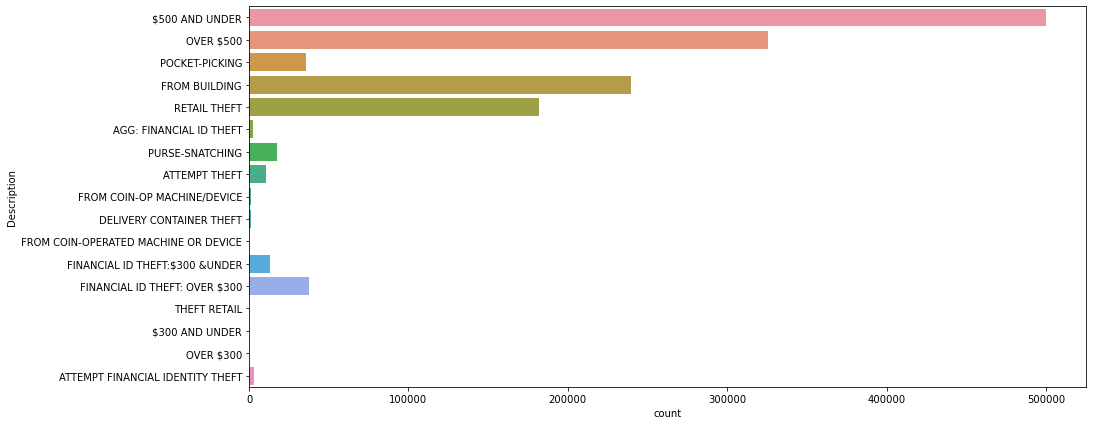

In [231]:
plt.figure(figsize = (15, 7))
sns.countplot(y = df_theft['Description'])

In [235]:
df_theft_data = pd.DataFrame({"Counts": df_theft['Description'].value_counts(),
                              "Description" : df_theft['Description'].value_counts().index})
df_theft_data.reset_index(inplace=True)
df_theft_data = df_theft_data.drop(columns=['index'], axis = 1)
df_theft_data.head()


Counts                    Description
0  500116                 $500 AND UNDER
1  325365                      OVER $500
2  239666                  FROM BUILDING
3  182183                   RETAIL THEFT
4   37857  FINANCIAL ID THEFT: OVER $300

<AxesSubplot:xlabel='Counts', ylabel='Description'>

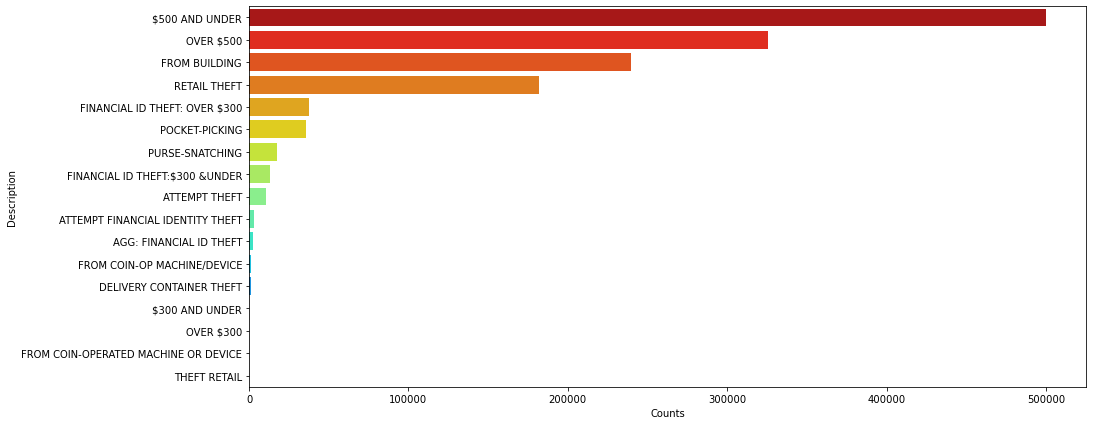

In [237]:
plt.figure(figsize = (15, 7))
sns.barplot(y ="Description", x = "Counts", data = df_theft_data, palette="jet_r")

In [240]:
df_theft['Date'] = pd.to_datetime(df_theft['Date'])

C:\Anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**The most crimes : less than 500 dollar and over 500 dollar**

In [242]:
df_theft["Month"] = df_theft["Date"].apply(lambda x : x.month)

C:\Anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [243]:
df_theft.head()

ID Case Number                Date                  Block  IUCR  \
62546  11622422    JC183696 2019-03-12 22:00:00        008XX E 38TH PL  0820   
63277  11661997    JC228271 2019-04-17 15:45:00   034XX W ARMITAGE AVE  0820   
63310  11662440    JC231024 2019-04-18 19:30:00  026XX W FULLERTON AVE  0820   
63418  11663358    JC232931 2019-04-21 18:00:00  052XX N NASHVILLE AVE  0810   
63482  11667017    JC237342 2019-04-25 00:30:00    016XX N WESTERN AVE  0820   

      Primary Type     Description            Location Description  Arrest  \
62546        THEFT  $500 AND UNDER   RESIDENTIAL YARD (FRONT/BACK)   False   
63277        THEFT  $500 AND UNDER  PARKING LOT/GARAGE(NON.RESID.)   False   
63310        THEFT  $500 AND UNDER                          STREET   False   
63418        THEFT       OVER $500                RESIDENCE-GARAGE   False   
63482        THEFT  $500 AND UNDER                       CTA TRAIN   False   

       Domestic  ...  Community Area  FBI Code  X Coordinate  Y Coordinate  \
62546     False  ...            36.0        06     1182276.0     1879784.0   
63277     False  ...            22.0        06     1153253.0     1913079.0   
63310     False  ...            22.0        06     1158218.0     1915850.0   
63418     False  ...            10.0        06     1131583.0     1934489.0   
63482     False  ...            24.0        06     1160111.0     1910846.0   

       Year              Updated On   Latitude  Longitude  \
62546  2019  08/17/2019 03:57:45 PM  41.825347 -87.606781   
63277  2019  08/17/2019 03:57:45 PM  41.917336 -87.712375   
63310  2019  08/17/2019 03:57:45 PM  41.924840 -87.694058   
63418  2019  08/17/2019 03:57:45 PM  41.976491 -87.791495   
63482  2019  08/17/2019 03:57:45 PM  41.911070 -87.687240   

                            Location  Month  
62546  (41.825346902, -87.606780575)      3  
63277  (41.917336159, -87.712375085)      4  
63310   (41.924839894, -87.69405765)      4  
63418  (41.976490526, -87.791494995)      4  
63482  (41.911069617, -87.687240439)      4  

[5 rows x 23 columns]

In [252]:
theft_in_months = pd.DataFrame({"thefts" : df_theft['Month'].value_counts(),
                                "month" : df_theft["Month"].value_counts().index})

In [253]:
theft_in_months

thefts  month
7   134951      7
8   134874      8
10  123426     10
6   123094      6
9   122905      9
5   120219      5
11  110492     11
12  106452     12
4   105368      4
3   101340      3
1   100877      1
2    85908      2

In [254]:
theft_in_months = theft_in_months.sort_values(["month"],ascending=True)

In [255]:
theft_in_months

thefts  month
1   100877      1
2    85908      2
3   101340      3
4   105368      4
5   120219      5
6   123094      6
7   134951      7
8   134874      8
9   122905      9
10  123426     10
11  110492     11
12  106452     12

#### we will see overall monthly thefts

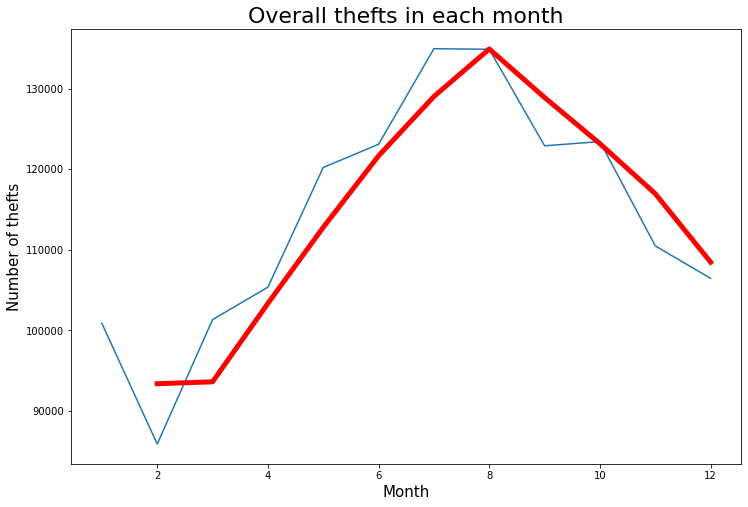

In [259]:
plt.figure(figsize=(12,8))
plt.plot(theft_in_months["month"],theft_in_months["thefts"],label = "Total in month")
plt.title("Overall thefts in each month", fontsize = 22)
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),
         color='red', linewidth=5, label='2-months Moving Average' )
plt.ylabel("Number of thefts", fontsize = 15)
plt.xlabel("Month", fontsize = 15)
plt.show()

### the theft crimes is incraesed in summer 

In [260]:
print(max(df_theft['Date']))
print(min(df_theft['Date']))

2020-06-15 23:00:00
2001-01-01 00:00:00


In [263]:
df_theft_dates = df_theft["Location"]
df_theft_dates.index = df_theft["Date"]
df_theft_resample = df_theft_dates.resample("D")
df_theft_dates["Mean"] = df_theft_resample.size().mean()
df_theft_dates["STD"] = df_theft_resample.size().std()



C:\Anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\envs\deep\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Anaconda3\envs\deep\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec

### Upper & Lower Control Limits

In [264]:
upper_limit = df_theft_dates["Mean"] + 3 *df_theft_dates["STD"]
lower_limit = df_theft_dates["Mean"] - 3 *df_theft_dates["STD"]

Wall time: 92 ms


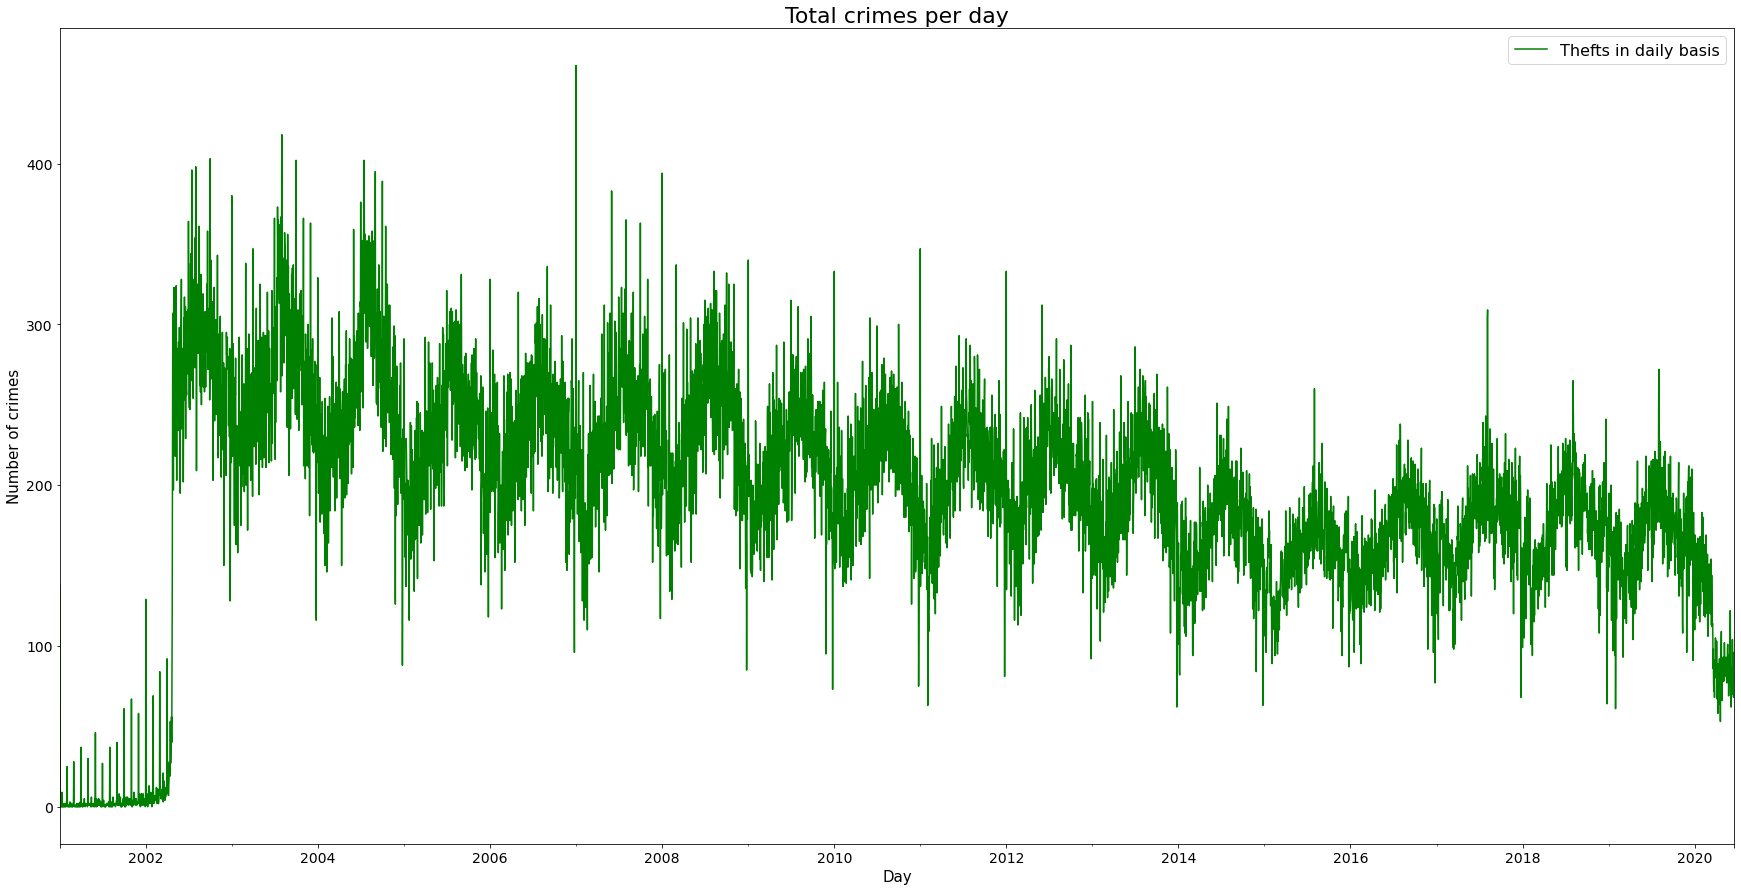

In [277]:
%%time 
plt.figure(figsize=(30,15))
df_theft_resample.size().plot(label = "Thefts in daily basis",color = "green")
#plt.plot(y=upper_limit,x=df_theft_resample.index,color = "red",ls="--",linewidth = 2 ,label = "Upper Limit Control")
#lower_limit.plot(color = "red",ls="--",linewidth = 2 ,label = "Lower Limit Control")
#df_theft_dates["Mean"].plot(color = "blue",linewidth = 2.5 , label = "Mean")

plt.title('Total crimes per day', fontsize=22)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Number of crimes', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

As we see at the begin and end of the year decreased and increased in months of summer , so chicage is danger in summer than rest of year.

## Weapons crimes 

In [281]:
df_theft_resample.size().mean()

192.78159301998312

In [282]:
df_assault = data[data["Primary Type"] == "ASSAULT"]

In [283]:
df_assault.shape

(408204, 22)

In [285]:
df_assault_data = pd.DataFrame({"Counts": df_assault['Description'].value_counts(), "Description" : df_assault['Description'].value_counts().index})
df_assault_data.reset_index(inplace=True)
df_assault_data = df_assault_data.drop(columns=['index'], axis = 1)
df_assault_data.head()

Counts                     Description
0  280554                          SIMPLE
1   44973             AGGRAVATED: HANDGUN
2   28628  AGGRAVATED:KNIFE/CUTTING INSTR
3   23761   AGGRAVATED: OTHER DANG WEAPON
4   14856     PRO EMP HANDS NO/MIN INJURY

<AxesSubplot:xlabel='Counts', ylabel='Description'>

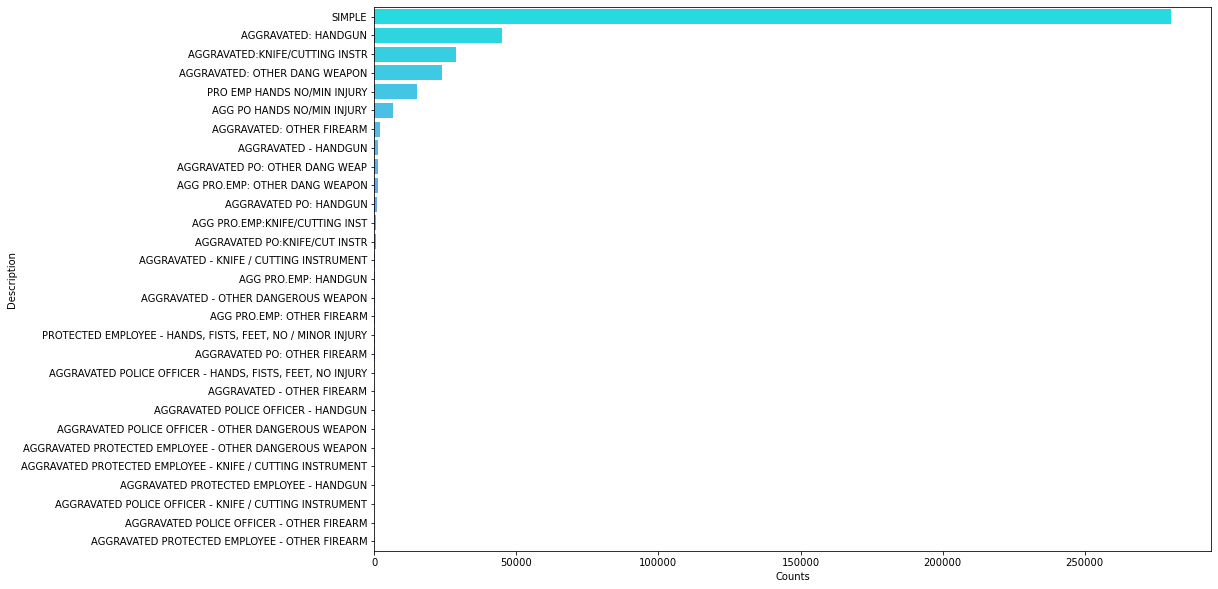

In [288]:
plt.figure(figsize = (15, 10))
sns.barplot(y ="Description", x = "Counts", data = df_assault_data, palette="cool")

In [289]:
unique_locations_assault = df_assault['Location'].value_counts()

Simple and handgun Threats still are a major problem in society and it's obvious to notice that most of these threats are based in Streets or Public Places.

In [291]:
Assault_index = pd.DataFrame({"Raw_String" : unique_locations_assault.index, "ValueCount":unique_locations_assault})
Assault_index.index = range(len(unique_locations_assault))
Assault_index.head()

Raw_String  ValueCount
0  (41.883210775, -87.629906972)         495
1  (41.976290414, -87.905227221)         358
2  (41.878370307, -87.707248137)         353
3  (41.706070186, -87.653645803)         330
4   (41.68995741, -87.637460623)         328

In [292]:
Assault_index['LocationCoord'] = Assault_index['Raw_String'].apply(Location_extractor)
Assault_index  = Assault_index.drop(columns=['Raw_String'], axis = 1)

In [293]:
chicago_crime_assault = folium.Map(location=[41.895140898, -87.624255632],zoom_start=13)

ValueCount                  LocationCoord
0              495  (41.883210775, -87.629906972)
1              358  (41.976290414, -87.905227221)
2              353  (41.878370307, -87.707248137)
3              330  (41.706070186, -87.653645803)
4              328   (41.68995741, -87.637460623)
...            ...                            ...
162339           1  (41.723062534, -87.626275325)
162340           1  (41.729517353, -87.546915552)
162341           1  (41.894608757, -87.620305786)
162342           1  (41.760117012, -87.597562083)
162343           1  (41.850701221, -87.712531806)

[162344 rows x 2 columns]

In [295]:
for i in range(1000):
    lat = Assault_index['LocationCoord'].iloc[i][0]
    long = Assault_index['LocationCoord'].iloc[i][1]
    radius = Assault_index['ValueCount'].iloc[i] / 3
    
    if Assault_index['ValueCount'].iloc[i] > 30:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Peace Disruptions : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               Assault_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_crime_assault)

In [296]:
folium.TileLayer('cartodbpositron').add_to(chicago_crime_assault)

In [297]:
chicago_crime_assault

## Public Peace Violations crimes

In [298]:
df_public_peace =  data[data['Primary Type'] == 'PUBLIC PEACE VIOLATION']

In [299]:
df_public_data = pd.DataFrame({"Counts": df_public_peace['Description'].value_counts(), "Description" : df_public_peace['Description'].value_counts().index})
df_public_data.reset_index(inplace=True)
df_public_data = df_public_data.drop(columns=['index'], axis = 1)
df_public_data.head()

Counts          Description
0   29203     RECKLESS CONDUCT
1    5203          BOMB THREAT
2    4124         ARSON THREAT
3    2278  FALSE POLICE REPORT
4    1852      OTHER VIOLATION

<AxesSubplot:xlabel='Counts', ylabel='Description'>

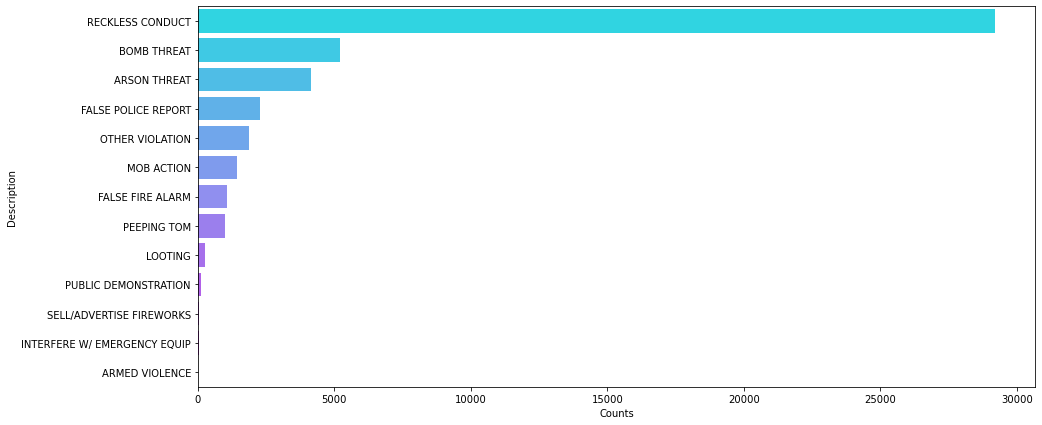

In [300]:
plt.figure(figsize = (15, 7))
sns.barplot(y ="Description", x = "Counts", data = df_public_data, palette="cool")

Reckless conduct it possible become murder or any thing bad, Bomb and Arson Threats still are a major problem in society and it's obvious to notice that most of these threats are based in Schools or Public Places or Streets.

In [301]:
unique_locations_bombs = df_public_peace['Location'].value_counts()

In [302]:
PB_index = pd.DataFrame({"Raw_String" : unique_locations_bombs.index, "ValueCount":unique_locations_bombs})
PB_index.index = range(len(unique_locations_bombs))
PB_index.head()

Raw_String  ValueCount
0  (41.881524451, -87.662706932)         182
1  (41.877585867, -87.683123746)         173
2   (41.78210152, -87.586502002)         171
3  (41.754168689, -87.601635756)         157
4  (41.878630716, -87.636673298)         155

In [303]:
PB_index['LocationCoord'] = PB_index['Raw_String'].apply(Location_extractor)
PB_index  = PB_index.drop(columns=['Raw_String'], axis = 1)

In [304]:
chicago_crime_pp = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13)

In [305]:
for i in range(500):
    lat = PB_index['LocationCoord'].iloc[i][0]
    long = PB_index['LocationCoord'].iloc[i][1]
    radius = PB_index['ValueCount'].iloc[i] / 3
    
    if PB_index['ValueCount'].iloc[i] > 30:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Peace Disruptions : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               PB_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_crime_pp)

In [306]:
chicago_crime_pp

In [322]:
Arrest_or_not = data['Arrest'].value_counts()

In [323]:
Arrest_Ratio = pd.DataFrame({"Raw_String" : Arrest_or_not.index, "ValueCount":Arrest_or_not})

In [338]:
Arrest_Ratio.head()

Raw_String  ValueCount
False      False     4704170
True        True     1754407

In [332]:
Arrest_Ratio["ValueCount"][1]

1754407

In [334]:
print("Arrest ratio : ",Arrest_Ratio["ValueCount"][1] / (Arrest_Ratio["ValueCount"][0]+Arrest_Ratio["ValueCount"][1]) , "%")

Arrest ratio :  0.2716398674197118 %


<AxesSubplot:>

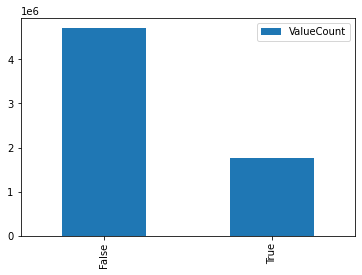

In [345]:
Arrest_Ratio.plot(kind="bar")

### If any crime occurred, about 73% of the criminal will not arrest.